In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
track_features = pd.read_csv("D:\\Spotify-Prediction\\Datasets\\Track_Features\\tf_mini.csv")
log_mini = pd.read_csv("D:\\Spotify-Prediction\\Datasets\\Training_Set\\log_mini.csv")
pd.set_option("display.max_columns", None)

# Track Features EDA

In [52]:
track_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50704 entries, 0 to 50703
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_id                50704 non-null  object 
 1   duration                50704 non-null  float64
 2   release_year            50704 non-null  int64  
 3   us_popularity_estimate  50704 non-null  float64
 4   acousticness            50704 non-null  float64
 5   beat_strength           50704 non-null  float64
 6   bounciness              50704 non-null  float64
 7   danceability            50704 non-null  float64
 8   dyn_range_mean          50704 non-null  float64
 9   energy                  50704 non-null  float64
 10  flatness                50704 non-null  float64
 11  instrumentalness        50704 non-null  float64
 12  key                     50704 non-null  int64  
 13  liveness                50704 non-null  float64
 14  loudness                50704 non-null

In [53]:
track_features.describe()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,5.070400e+04,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000,50704.000000
mean,222.267980,2010.324748,99.455131,0.250336,0.492075,0.514526,0.611742,8.215950,0.641440,0.996548,7.058671e-02,5.269111,0.205520,-7.519316,0.547603,0.391874,0.122998,121.576396,3.913163,0.487804,-0.332295,0.202193,0.153935,-0.040526,-0.027247,0.049475,-0.197758,0.005153
std,72.224839,11.471866,1.139222,0.276047,0.158102,0.182595,0.166146,2.410626,0.207957,0.045611,2.142261e-01,3.597578,0.176486,3.927858,0.223803,0.207116,0.136022,29.786741,0.410036,0.246376,0.416320,0.254024,0.212660,0.333129,0.377457,0.144205,0.349840,0.324259
min,30.013330,1950.000000,90.018900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.122792,-1.084360,-0.752231,-0.809136,-1.029858,-0.942461,-0.736395,-0.975647
25%,183.933334,2009.000000,99.509670,0.025291,0.374378,0.372463,0.502499,6.356671,0.507839,0.975910,1.084167e-08,2.000000,0.098249,-8.942000,0.366652,0.225742,0.038028,97.158997,4.000000,0.292559,-0.745148,0.086460,0.051604,-0.294574,-0.318751,-0.038337,-0.444849,-0.176821
50%,214.866669,2015.000000,99.865444,0.135821,0.493764,0.522266,0.625145,8.015075,0.661368,1.003790,2.211650e-06,5.000000,0.131403,-6.688000,0.571023,0.364057,0.061794,120.115498,4.000000,0.478244,-0.334799,0.265535,0.207705,-0.001755,-0.176974,0.062719,-0.298599,0.090423
75%,250.426666,2017.000000,99.961131,0.406142,0.604994,0.655912,0.736241,9.792092,0.803185,1.026137,7.654784e-04,8.000000,0.262823,-5.043000,0.729537,0.533131,0.160202,141.014008,4.000000,0.677947,0.045921,0.359553,0.296132,0.146828,0.280852,0.160366,-0.075158,0.194285
max,1787.760986,2018.000000,99.999997,0.995796,0.990419,0.972590,0.984952,32.342781,0.999877,1.103213,9.993988e-01,11.000000,0.996257,1.634000,1.000000,0.962350,0.961408,218.774994,5.000000,0.999990,0.932165,0.812837,0.605288,1.074504,0.895769,0.380279,0.966760,1.152213


In [54]:
bins = [0,0.5,1.0]
labels = ['Low Confidence (0-0.5)','High Confidence (0.5-1.0)']
track_features['acoustic_confidence'] = pd.cut(track_features['acousticness'],bins,labels=labels)

In [55]:
bins = [0,0.5,1.0]
labels = ['Sad/Depressed/Angry tone (0-0.5)','Happy/Cheerful/Euphoric tone (0.5-1.0)']
track_features['Song_tone'] = pd.cut(track_features['valence'],bins,labels=labels)

In [56]:
bins = [0,0.5,1.0]
labels = ['Least Danceable (0-0.5)','Most Danceable (0.5-1.0)']
track_features['Danceable_Rating'] = pd.cut(track_features['danceability'],bins,labels=labels)

In [57]:
bins = [0,0.33,0.66,1.0]
labels = ['Only music (< 0.33)','Music and Speech (0.33-0.66)','Speech (> 0.66)']
track_features['Speechiness_Form'] = pd.cut(track_features['speechiness'],bins,labels=labels)

In [58]:
track_features

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,acoustic_confidence,Song_tone,Danceable_Rating,Speechiness_Form
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,3.254327e-06,0,0.132124,-11.238,0.386100,major,0.541606,0.079985,166.287003,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907,Low Confidence (0-0.5),Happy/Cheerful/Euphoric tone (0.5-1.0),Least Danceable (0-0.5),Only music (< 0.33)
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,major,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795,High Confidence (0.5-1.0),Sad/Depressed/Angry tone (0-0.5),Least Danceable (0-0.5),Only music (< 0.33)
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,2.927475e-10,0,0.090115,-10.522,0.200669,minor,0.806136,0.038777,105.185997,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496,High Confidence (0.5-1.0),Happy/Cheerful/Euphoric tone (0.5-1.0),Least Danceable (0-0.5),Only music (< 0.33)
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,3.981341e-11,0,0.360924,-11.032,0.427152,major,0.492772,0.038337,119.441002,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753,Low Confidence (0-0.5),Happy/Cheerful/Euphoric tone (0.5-1.0),Most Danceable (0.5-1.0),Only music (< 0.33)
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,0.976866,2.541884e-10,0,0.189162,-6.836,0.281250,major,0.723808,0.032043,95.261002,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496,High Confidence (0.5-1.0),Happy/Cheerful/Euphoric tone (0.5-1.0),Least Danceable (0-0.5),Only music (< 0.33)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50699,t_402930af-4174-47ec-b1fd-593d93597624,184.686798,2018,99.315966,0.584765,0.521544,0.515087,0.653140,7.684220,0.336433,1.042727,8.633797e-04,11,0.102380,-10.820,0.597561,major,0.501950,0.037479,92.927002,4,0.542063,-0.196001,0.301727,0.238880,-0.391421,0.016690,0.247235,-0.399387,-0.192473,High Confidence (0.5-1.0),Happy/Cheerful/Euphoric tone (0.5-1.0),Most Danceable (0.5-1.0),Only music (< 0.33)
50700,t_e5f9a069-a893-452e-ab21-49b4eaebfbd0,251.813324,2018,99.918573,0.406680,0.565200,0.693126,0.844861,11.176841,0.709085,0.988095,2.412876e-06,11,0.110893,-5.966,0.583710,major,0.411513,0.317291,124.168999,4,0.472353,-0.545160,0.271596,0.274377,0.043951,-0.322946,0.150802,0.159378,0.384336,Low Confidence (0-0.5),Sad/Depressed/Angry tone (0-0.5),Most Danceable (0.5-1.0),Only music (< 0.33)
50701,t_3983306d-13b4-4027-9391-7236ca93d2bf,157.520004,2018,98.517692,0.001279,0.414721,0.341769,0.463543,5.405471,0.975503,0.870077,1.271703e-04,11,0.320818,-3.044,0.393162,major,0.429100,0.061294,107.156998,4,0.766519,0.112592,0.368523,-0.466950,-0.468494,0.640088,0.050771,-0.258999,0.258766,Low Confidence (0-0.5),Happy/Cheerful/Euphoric tone (0.5-1.0),Least Danceable (0-0.5),Only music (< 0.33)
50702,t_74eb6e99-210b-440c-8d7b-4db6617d1c80,129.105392,2018,99.902866,0.139452,0.688375,0.733720,0.850959,10.778521,0.666146,1.051821,1.652945e-12,11,0.105345,-5.334,0.796875,minor,0.174222,0.069366,134.

In [59]:
track_features['acoustic_confidence'].value_counts()

Low Confidence (0-0.5)       40711
High Confidence (0.5-1.0)     9990
Name: acoustic_confidence, dtype: int64

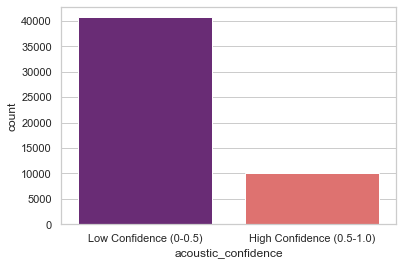

In [60]:
sns.countplot(x = 'acoustic_confidence',data = track_features,palette = 'magma')
plt.show()

In [61]:
track_features['Danceable_Rating'].value_counts()

Most Danceable (0.5-1.0)    38252
Least Danceable (0-0.5)     12426
Name: Danceable_Rating, dtype: int64

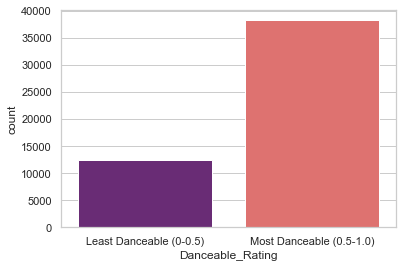

In [62]:
sns.countplot(x = 'Danceable_Rating',data = track_features,palette = 'magma')
plt.show()

In [63]:
track_features['mode'].value_counts()

major    32555
minor    18149
Name: mode, dtype: int64

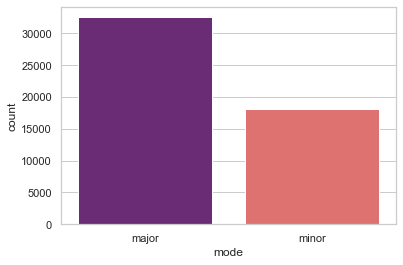

In [64]:
sns.set_theme(style = "whitegrid")
sns.countplot(x = "mode",data = track_features,palette = 'magma')
plt.show()

In [65]:
track_features['Speechiness_Form'].value_counts()

Only music (< 0.33)             46459
Music and Speech (0.33-0.66)     3705
Speech (> 0.66)                   514
Name: Speechiness_Form, dtype: int64

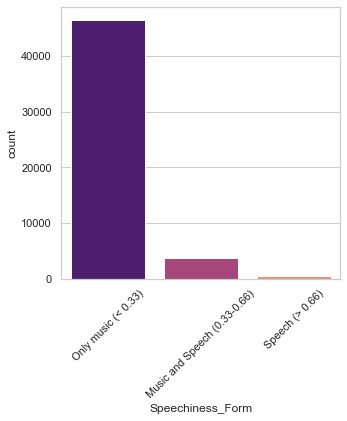

In [66]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = "Speechiness_Form",data = track_features,palette = 'magma')
plt.xticks(rotation = 45)
plt.show()

In [67]:
track_features['Song_tone'].value_counts()

Sad/Depressed/Angry tone (0-0.5)          26812
Happy/Cheerful/Euphoric tone (0.5-1.0)    23866
Name: Song_tone, dtype: int64

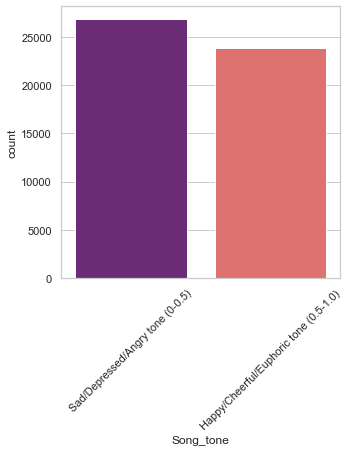

In [68]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = "Song_tone",data = track_features,palette = 'magma')
plt.xticks(rotation = 45)
plt.show()

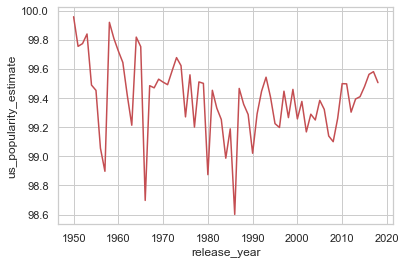

In [69]:
sns.lineplot(x = "release_year",y = "us_popularity_estimate",data = track_features,ci = None,color = 'r')
plt.show()

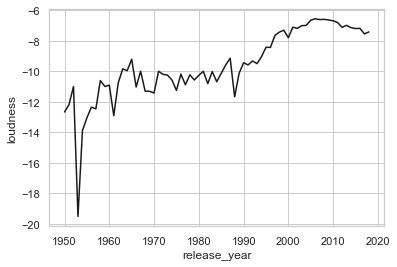

In [70]:
sns.lineplot(x = "release_year",y = "loudness",data = track_features,ci = None,color = 'k')
plt.show()

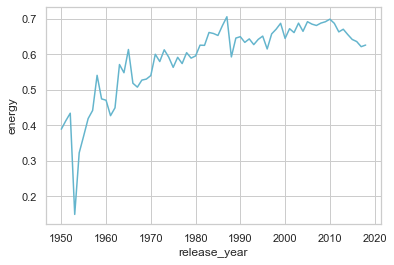

In [71]:
sns.lineplot(x = "release_year",y = "energy",data = track_features,ci = None,color = 'c')
plt.show()

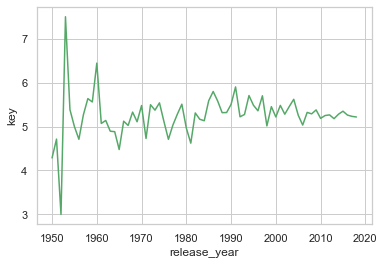

In [72]:
sns.lineplot(x = "release_year",y = "key",data = track_features,ci = None,color = 'g')
plt.show()

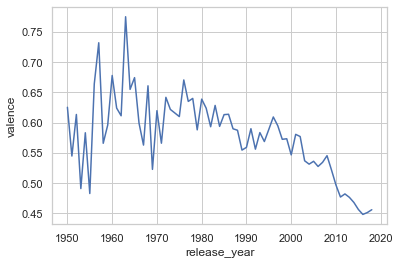

In [73]:
sns.lineplot(x = "release_year", y = "valence",data = track_features, ci = None)
plt.show()

Text(0.5, 0, 'Release_year')

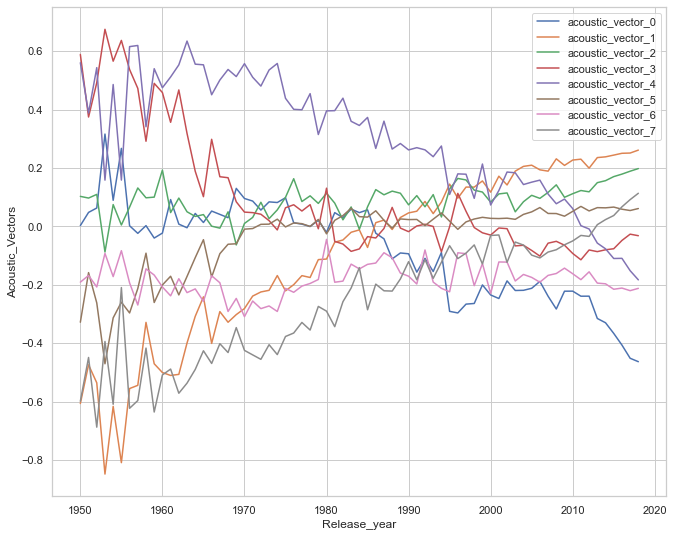

In [74]:
plt.figure(figsize=(11, 9))
ac_vc = ['acoustic_vector_0','acoustic_vector_1','acoustic_vector_2','acoustic_vector_3','acoustic_vector_4','acoustic_vector_5','acoustic_vector_6','acoustic_vector_7']

for x in ac_vc:
    ax = sns.lineplot(x = "release_year", y = x,label = x,data = track_features,ci = None)
    
    
ax.set_ylabel('Acoustic_Vectors',fontsize = 12)
ax.set_xlabel('Release_year',fontsize = 12)

# Training Set EDA

In [75]:
log_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   session_id                       167880 non-null  object
 1   session_position                 167880 non-null  int64 
 2   session_length                   167880 non-null  int64 
 3   track_id_clean                   167880 non-null  object
 4   skip_1                           167880 non-null  bool  
 5   skip_2                           167880 non-null  bool  
 6   skip_3                           167880 non-null  bool  
 7   not_skipped                      167880 non-null  bool  
 8   context_switch                   167880 non-null  int64 
 9   no_pause_before_play             167880 non-null  int64 
 10  short_pause_before_play          167880 non-null  int64 
 11  long_pause_before_play           167880 non-null  int64 
 12  hist_user_behavi

In [76]:
log_mini

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,16,20,t_360910e8-2a84-42b0-baf1-59abcf96a1f2,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167876,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,17,20,t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167877,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,18,20,t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone
167878,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,19,20,t_e172e8e7-7161-42a9-acb0-d606346c8f87,False,False,False,True,0,1,0,0,0,0,False,13,2018-07-15,True,user_collection,trackdone,trackdone


In [77]:
log_mini['session_length'].value_counts()

20    101320
11      8272
10      8190
12      7752
13      7111
15      6525
14      6426
19      5966
18      5454
17      5440
16      5424
Name: session_length, dtype: int64

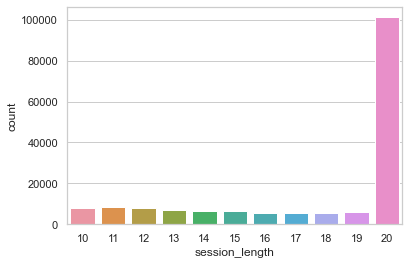

In [78]:
sns.countplot(x = "session_length",data = log_mini)
plt.show()

In [79]:
log_mini['skip_1'].value_counts()

False    97118
True     70762
Name: skip_1, dtype: int64

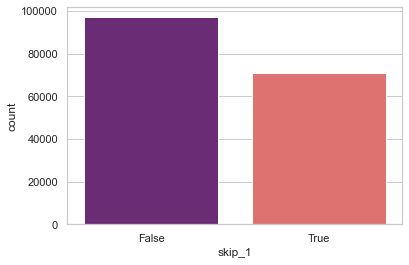

In [80]:
sns.countplot(x = "skip_1",data = log_mini,palette = 'magma')
plt.show()

In [81]:
log_mini['skip_2'].value_counts()

True     86824
False    81056
Name: skip_2, dtype: int64

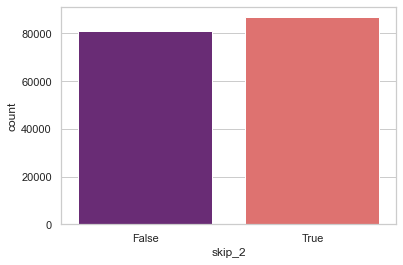

In [82]:
sns.countplot(x = "skip_2",data = log_mini,palette = 'magma')
plt.show()

In [83]:
log_mini['skip_3'].value_counts()

True     108850
False     59030
Name: skip_3, dtype: int64

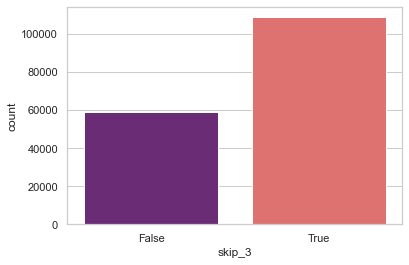

In [84]:
sns.countplot(x = "skip_3",data = log_mini,palette = 'magma')
plt.show()

In [85]:
log_mini['context_type'].value_counts()

user_collection          67430
catalog                  38263
editorial_playlist       35663
radio                    21107
personalized_playlist     2976
charts                    2441
Name: context_type, dtype: int64

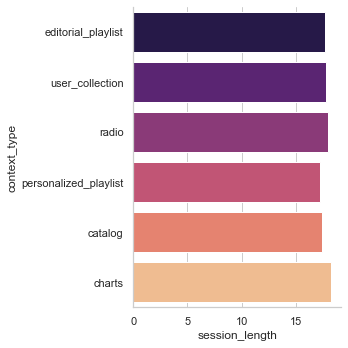

In [86]:
sns.catplot(x = 'session_length',y = "context_type",data = log_mini,kind = 'bar',ci = None,palette = 'magma')
plt.show()

In [87]:
log_mini['hist_user_behavior_reason_start'].value_counts()

fwdbtn        79912
trackdone     55075
clickrow      17514
backbtn       13034
appload        1942
playbtn         155
remote          136
trackerror       92
endplay          20
Name: hist_user_behavior_reason_start, dtype: int64

In [88]:
log_mini['hist_user_behavior_reason_end'].value_counts()

fwdbtn       81389
trackdone    57701
endplay      14823
backbtn      13129
logout         563
remote         267
clickrow         8
Name: hist_user_behavior_reason_end, dtype: int64

In [89]:
log_mini['premium'].value_counts()

True     136053
False     31827
Name: premium, dtype: int64

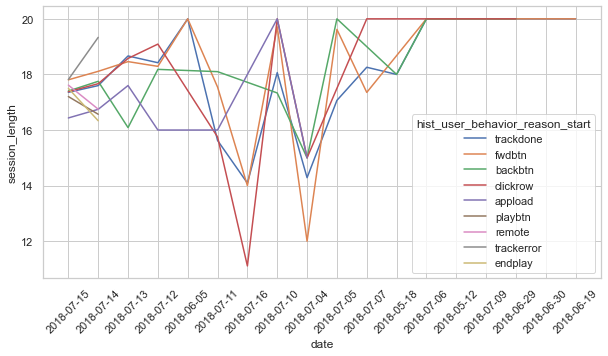

In [90]:
plt.figure(figsize = (10,5))
ax = sns.lineplot(x = "date",y = 'session_length',hue = 'hist_user_behavior_reason_start',data = log_mini,color = 'red',ci = None)
plt.xticks(rotation = 45)
plt.show()

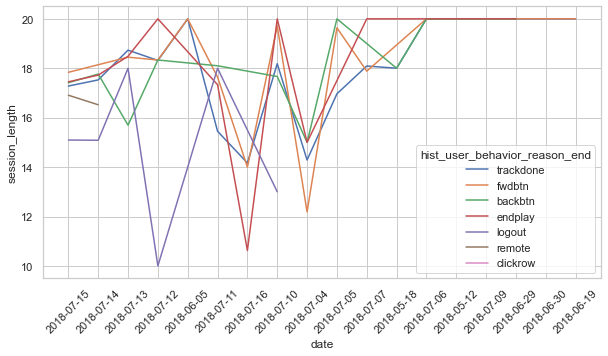

In [91]:
plt.figure(figsize = (10,5))
ax = sns.lineplot(x = "date",y = 'session_length',hue = 'hist_user_behavior_reason_end',data = log_mini,color = 'red',ci = None)
plt.xticks(rotation = 45)
plt.show()

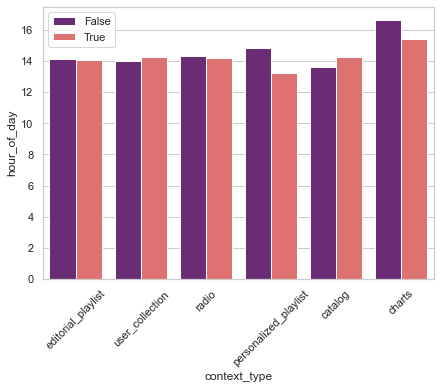

In [92]:
plt.figure(figsize = (7,5))
ax = sns.barplot(x = 'context_type',y = 'hour_of_day',data = log_mini,ci = None, hue = 'premium',palette = 'magma')
plt.xticks(rotation = 45)
plt.legend(loc='upper left')
plt.show()

In [93]:
log_mini.rename(columns = {'track_id_clean':'track_id'},inplace = True)

In [94]:
merged_features = pd.merge(left = track_features,right = log_mini,left_on = 'track_id',right_on = 'track_id')

In [97]:
merged_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 54 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   track_id                         167880 non-null  object  
 1   duration                         167880 non-null  float64 
 2   release_year                     167880 non-null  int64   
 3   us_popularity_estimate           167880 non-null  float64 
 4   acousticness                     167880 non-null  float64 
 5   beat_strength                    167880 non-null  float64 
 6   bounciness                       167880 non-null  float64 
 7   danceability                     167880 non-null  float64 
 8   dyn_range_mean                   167880 non-null  float64 
 9   energy                           167880 non-null  float64 
 10  flatness                         167880 non-null  float64 
 11  instrumentalness                 167880 non-null  fl

In [95]:
merged_features

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,acoustic_confidence,Song_tone,Danceable_Rating,Speechiness_Form,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,3.254327e-06,0,0.132124,-11.238,0.386100,major,0.541606,0.079985,166.287003,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907,Low Confidence (0-0.5),Happy/Cheerful/Euphoric tone (0.5-1.0),Least Danceable (0-0.5),Only music (< 0.33),0_0e4a49d8-688d-4958-94db-5cb56adc3090,10,10,False,False,False,False,0,1,0,0,0,0,True,10,2018-07-15,True,user_collection,trackdone,trackdone
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,major,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795,High Confidence (0.5-1.0),Sad/Depressed/Angry tone (0-0.5),Least Danceable (0-0.5),Only music (< 0.33),0_0cc4863b-83ff-48cb-afda-f952ad323562,8,11,False,False,False,True,0,1,0,0,0,0,False,23,2018-07-14,True,radio,trackdone,trackdone
2,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,major,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795,High Confidence (0.5-1.0),Sad/Depressed/Angry tone (0-0.5),Least Danceable (0-0.5),Only music (< 0.33),0_0cc4863b-83ff-48cb-afda-f952ad323562,10,11,True,True,True,False,0,1,0,0,0,0,False,23,2018-07-14,True,radio,backbtn,fwdbtn
3,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,2.927475e-10,0,0.090115,-10.522,0.200669,minor,0.806136,0.038777,105.185997,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496,High Confidence (0.5-1.0),Happy/Cheerful/Euphoric tone (0.5-1.0),Least Danceable (0-0.5),Only music (< 0.33),0_061d77c2-5526-43b2-993c-adf4338897ce,6,10,False,False,False,True,0,0,1,1,0,0,False,22,2018-07-14,True,user_collection,trackdone,trackdone
4,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,3.981341e-11,0,0.360924,-11.032,0.427152,major,0.492772,0.038337,119.441002,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753,Low Confidence (0-0.5),Happy/Cheerful/Euphoric tone (0.5-1.0),Most Danceable (0.5-1.0),Only music (< 0.33),0_091c94f6-e76b-4b3e-8366-5d9d3c3e2fef,2,20,False,False,True,False,0,0,1,1,0,0,False,20,2018-07-14,True,catalog,trackdone,endplay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167875,t_74eb6e99-210b-440c-8d7b-4db6617d1c80,129.105392,2018,99.902866,0.139452,0.688375,0.733720,0.850959,10.778521,0.666146,1.051821,1.652945e-12,11,0.105345,-5.334,0.796875,minor,0.174222,0.069366,134.067993,4,0.058505,-0.855291,0.365487,0.273034,0.108294,-0.206204,0.007847,-0.408226,0.143629,Low Confidence (0-0.5),Sad